## Kmeans
Training - Iterative optimize
- Initialize k centroids randomly
- Repeate until converged: 
    - Update cluster labels: Assign points to the nearest cluste center (centroid)
    - Update cluster centers (centroids): set center to the mean of each cluster


#### Test point
- Implementations skills
- Details 

In [24]:
import numpy as np
import matplotlib.pyplot as plt 


class KMeans:
    def __init__(self, K = 5, max_iters = 100, plot_steps = True):
        self.K = K 
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # lists of sample indicices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # list of centroids 
        self.centroids = []

    @staticmethod
    def euclidean_distance(x, y):
        # sum (x-y)^2
        return np.sqrt(np.sum((x - y) ** 2))
    
    def predict(self, X):
        self.X = X 
        self.n_samples, self.n_features = X.shape

        # initialize centroid randomly from exist data 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False) # we want difffernt centroids
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # iterate to optimize clusters
        for _ in range(self.max_iters):
            # assign sample to the closet centroids 
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()
            
            # calculate new centroids from the clusters
            centroid_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if the algorithm is converged by comparing old and new centroids
            if self._is_converged(centroid_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids):
        # assign the sample to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, x in enumerate(self.X):
            dists = [self.euclidean_distance(x, center) for center in centroids]
            cluster_idx = np.argmin(dists)
            clusters[ cluster_idx].append(idx)
        return clusters 
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for idx, cluster_sample_idx in enumerate(clusters):
            # average all the sample 
            new_centroid = np.mean(self.X[cluster_sample_idx], axis = 0)
            centroids[idx] = new_centroid
        return centroids 
    
    def _is_converged(self, centroid_old, centroid_new, tol = 0.01):
        # If distance between old and new centroids are small, we think it' converged
        distances = [self.euclidean_distance(n, o) for n, o in zip(centroid_old, centroid_new)]
        return sum(distances) < tol

    def _get_cluster_labels(self, clusters):
        # extend the cluster nested lists to get label for each sample
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx 
        return labels 
    
    def plot(self):
        fig, ax = plt.subplots(figsize = (12,8))
        
        for i, idx in enumerate(self.clusters):
            points = self.X[idx].T
            ax.scatter(*points)

        for center in self.centroids:
            ax.scatter(*center, marker = "x", color = "black", linewidth = 2)
        
        plt.show()

(500, 2)
3


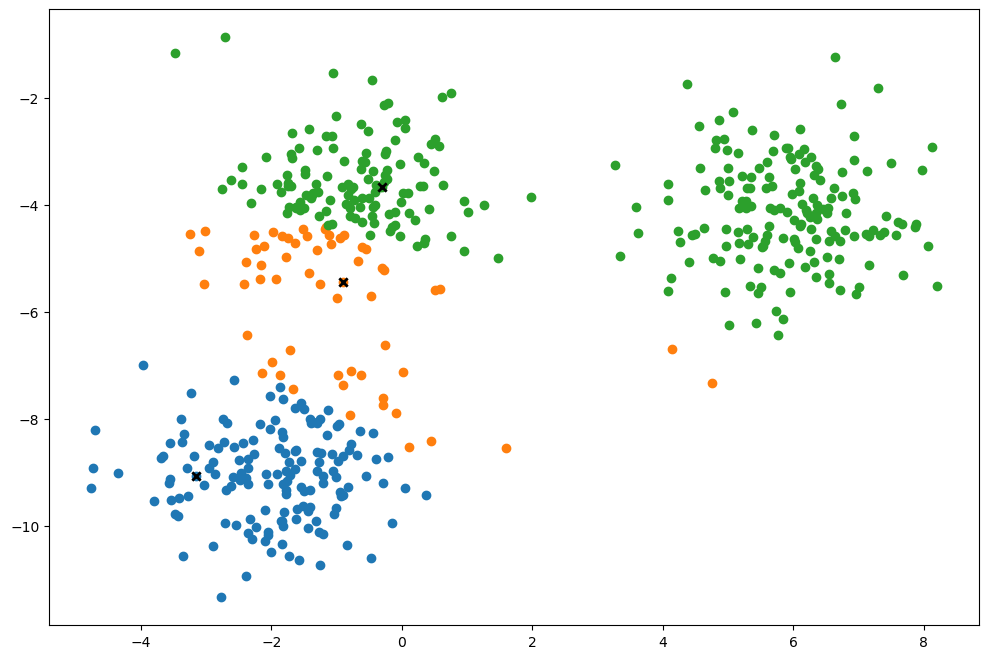

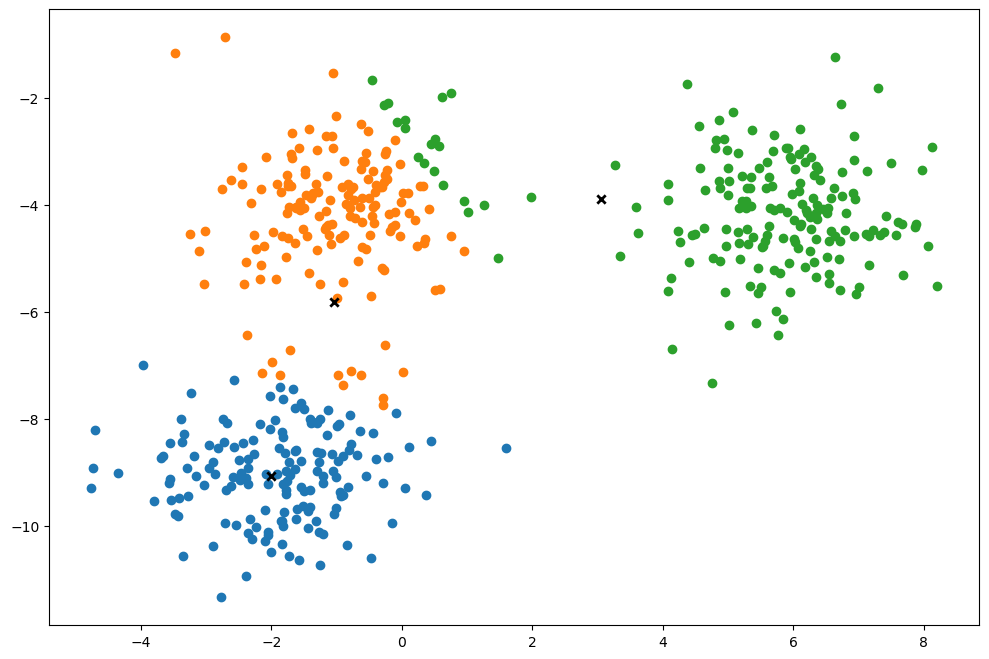

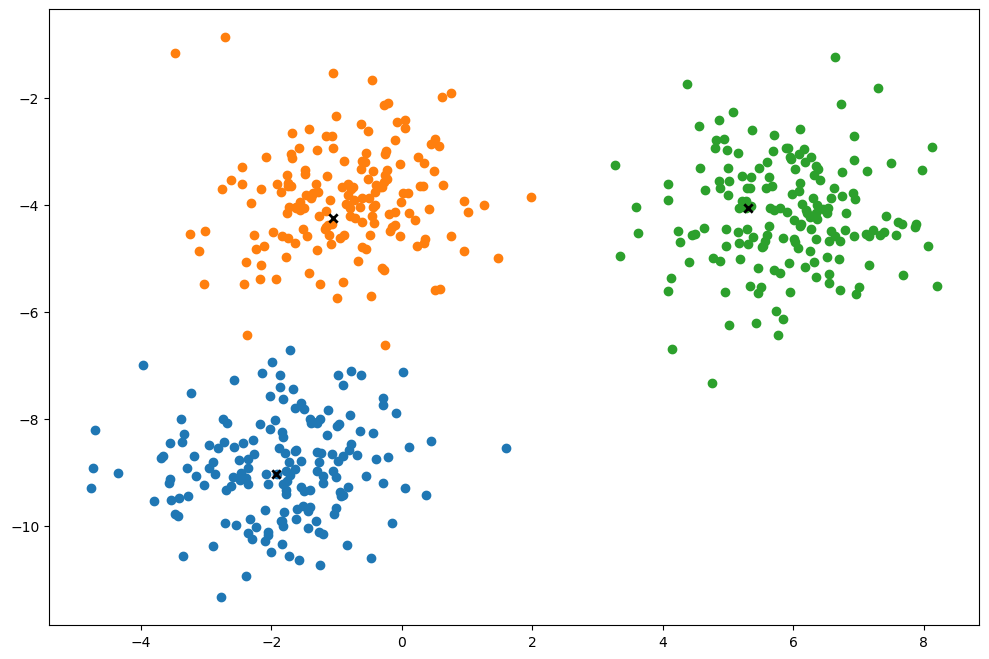

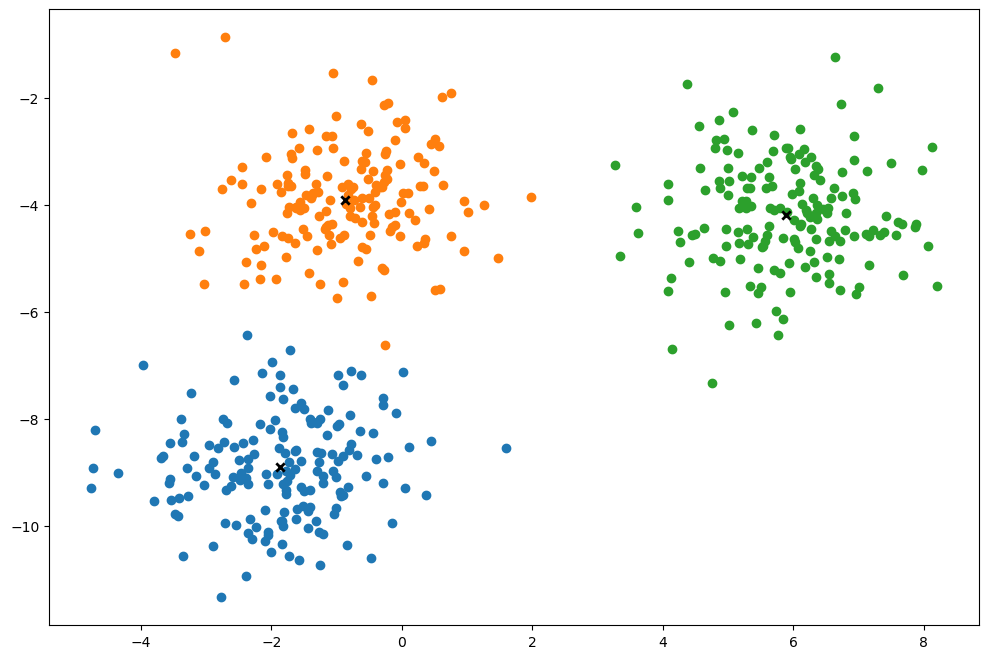

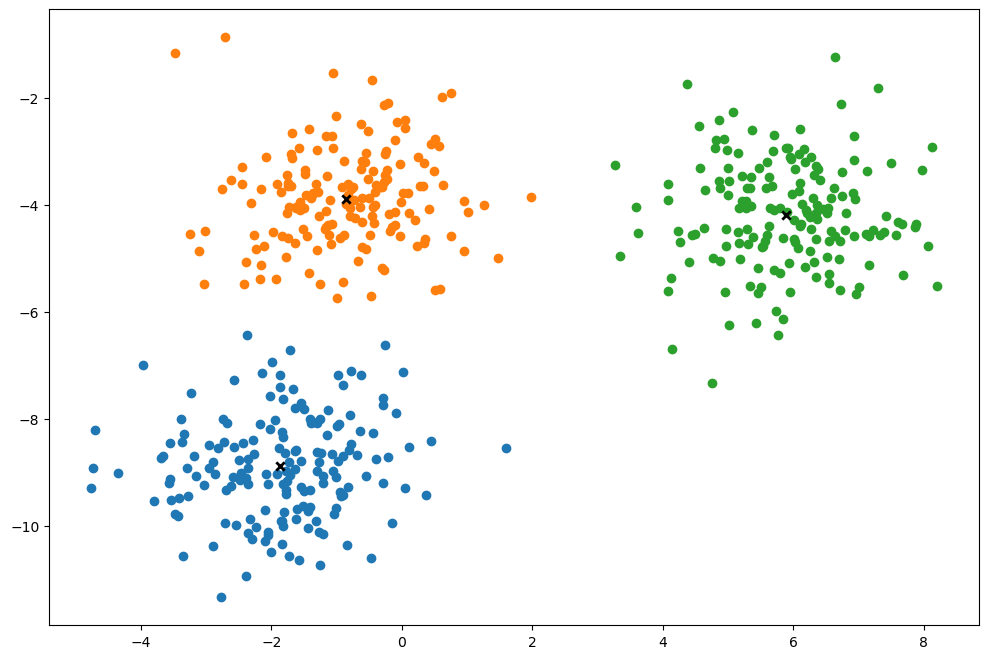

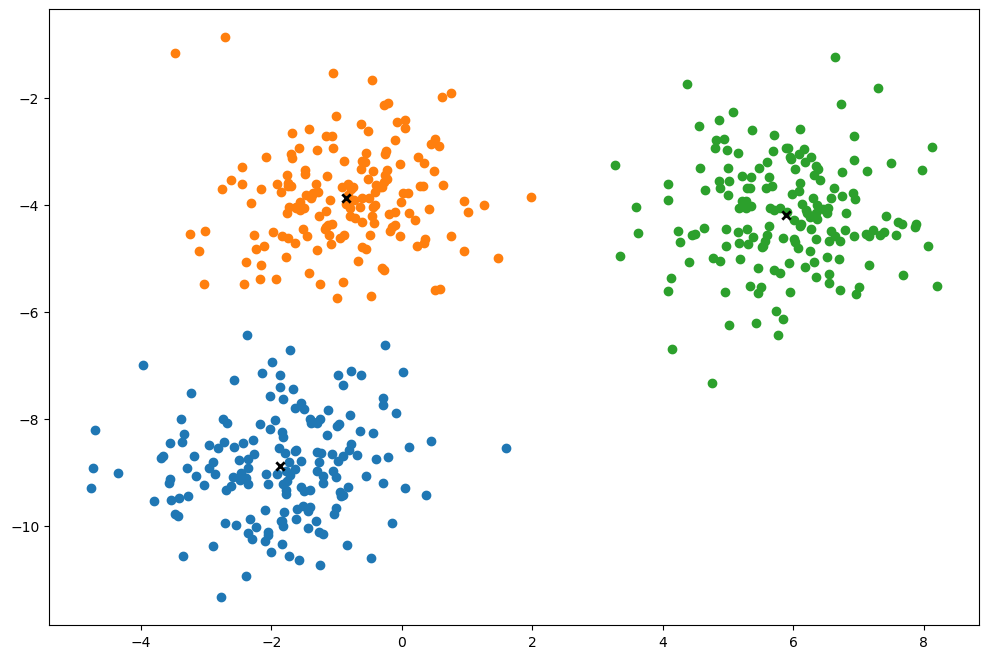

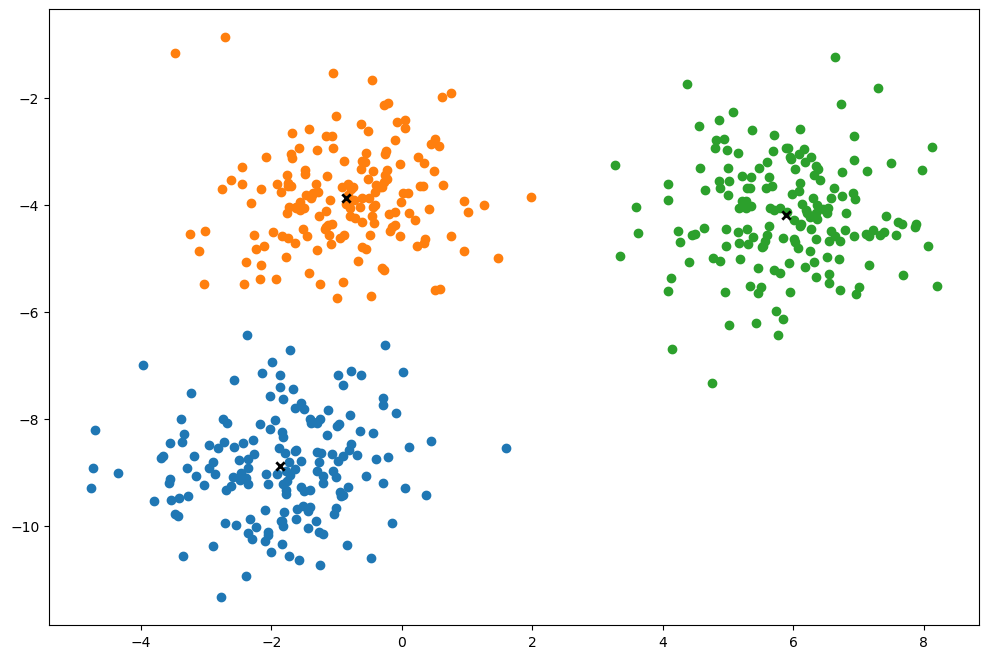

In [25]:
# Testing
if __name__ == "__main__":
    np.random.seed(42)
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()